# CS 4501 Algorithmic Economics - Project 2

In this project, our team explores a reinforcement learning approach to economic game theory. In task I, we explore playing a pennies game and rock-paper-scissors with full information. Full information means that both players in a game have knowledge about the opponent's strategy (<em>i<sub>t</sub></em>, <em>j<sub>t</sub></em>) at any time <em>t</em>. Furthermore, knowing the strategy, both players know their own utility as portrayed in the payoff matrix.

### Task I: Uncoupled No-Regret Learning Dynamics under Full Information

In [76]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

#### Question (a) - Pennies game

Here, we create a multiplicative weight update (MWU) algorithm. The MWU algorithm follows the logic that past performance should guide the choices made now. Within the algorithm, we must define the following variables:
<ul>
<li><em>k</em>: number of strategies</li>
<li><em>T</em>: number of iterations
<li><em>w</em>: weights that determine the power of a strategy</li>
<li><em>M</em>: payoff matrix</li>
<li><em>cost</em>: the disutility from opponent winning the game</li>
</ul>
<newline>
The MWU algorithm uses the payoff matrix and a probability distribution to run a cost iterations that update the weights to select the best strategy for that player, given knowledge about the opponent. 

In [1]:
# An example template of the Multiplicative Weight Update Algorithm. You DO NOT have to use this template

# ------- Multiplicative Weight Update Algorithm -------#
def MWU(M_a, M_b, compute_epsilon, T = 3000):
    """
    Inputs:
        M_a: the k by k payoff matrix for player A, where k is the number of strategies: M_a[i,j] - the utility of A where A plays i and B plays j
        
        M_b: the k by k payoff matrix for player B, where k is the number of strategies: M_b[i,j] - the utility of B where A plays i and B plays j
        
        compute_epsilon: the function that computes epsilon
        
        T: the number of iterations. Default is 3000
        
    Output (you may use any data struct):
        avg_conv_a: the avg convergence seqeunce of A
        avg_conv_b: the avg convergence seqeunce of B
        last_conv_a: the last convergence seqeunce of A
        last_conv_b: the last convergence seqeunce of B
    """
    
    # The number of strategies
    k = M_a.shape[0]
    
    # The initial weight matrix for player A and B: w_a[i] - the weight of strategy i for player A
    w_a = np.array([random.uniform(0, 1) for _ in range(k)])
    w_b = np.array([random.uniform(0, 1) for _ in range(k)])
    
    # The convergence seqeunces
    avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = ([None] * T for i in range(4)) 

    # Sum of probability (used to compute average convergence sequences)
    sum_p_a = 0.0
    sum_p_b = 0.0
    
    # The game starts
    for t in range(T):

        # Compute epsilon
        epsilon = compute_epsilon(t)
        
        # ---------- Fill out the details --------------# 
        # Simple matrix operations can be used here

        #sum of weights
        sum_w_a = np.sum(w_a)
        sum_w_b = np.sum(w_b)

        #probability
        p_a = w_a/sum_w_a #normalizing
        p_b = w_b/sum_w_b

        #adding probabilities
        sum_p_a += p_a[0]
        sum_p_b += p_b[0]
        
        # cost vector
        cost_a = np.matmul(M_a, p_b)
        cost_b = np.matmul(M_b.T, p_a)

        #updating weights
        w_a = np.multiply(w_a, np.ones(k) - epsilon*cost_a)
        w_b = np.multiply(w_b, np.ones(k) - epsilon*cost_b)
        
        # avg convergence
        avg_conv_a[t] = sum_p_a/(t+1)
        avg_conv_b[t] = sum_p_b/(t+1)

        # last convergence
        last_conv_a[t] = p_a[0]
        last_conv_b[t] = p_b[0]
        
    return avg_conv_a, avg_conv_b, last_conv_a, last_conv_b

Here, we have defined the payoff matrix for both player A and player B.

In the payoff matrix, we observe that pennies is a zero-sum game. Whenever player A gains, player B loses the same amount. Because we are assigning probabilities to each pure strategy (heads or tails), we can attain mixed strategy Nash equillibria in these games.

In [78]:
# Example payoff matrices for pennies game. 0 - head; 1 - tail
M_a = np.array([[-1, 1], [1, -1]])
M_b = np.array([[1, -1], [-1, 1]])

Below, we observe average convergence and last-iteration convergence for our MWU algorithm. Convergence helps us find a stable point after a sequence of solutions found in each iteration of the MWU algorithm.

<strong>Average convergence</strong> sums all the probabilities assigned to each strategy and averages it over the total iterations

<strong>Last-iteration convergence</strong> picks the last probability assignment on the <em>T</em>th iteration

In [79]:
def avg_conv(avg_conv_a, avg_conv_b):
    x = list(range(0, 3000))
    plt.plot(avg_conv_a, avg_conv_b)
    plt.xlabel("Player A")
    plt.ylabel("Player B")
    plt.title("Avg game convergence")

In [80]:
def last_conv(last_conv_a, last_conv_b):
    x = list(range(0, 3000))
    plt.plot(last_conv_a, last_conv_b)
    plt.xlabel("Player A")
    plt.ylabel("Player B")
    plt.title("Last game convergence")

In [81]:
def time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b):
    time = list(range(1, 3001))
    figure, graphs = plt.subplots(1, 2, figsize=(12, 3))
    
    graphs[0].plot(time, avg_conv_a, label='Player A')
    graphs[0].plot(time, avg_conv_b, label='Player B')
    graphs[1].plot(time, last_conv_a, label='Player A')
    graphs[1].plot(time, last_conv_b, label='Player B')
    
    graphs[0].legend(loc='upper right', prop={'size': 7})
    graphs[0].set_title("Average Convergence")
    graphs[1].legend(loc='upper right', prop={'size': 7})
    graphs[1].set_title("Last Iteration Convergence")

**Choice 1: epsilon = 1/2**

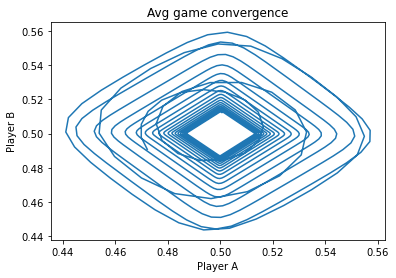

In [82]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

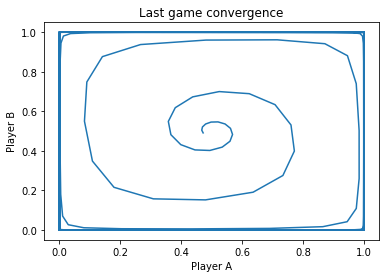

In [83]:
last_conv(last_conv_a, last_conv_b)

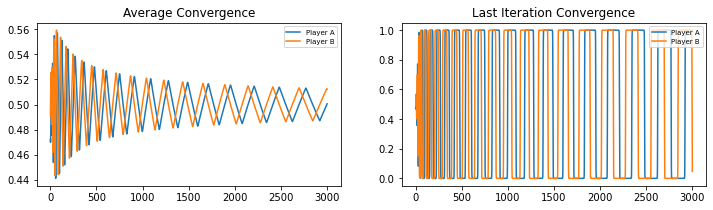

In [84]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 2: epsilon = 1/t**

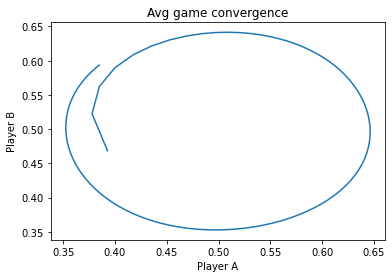

In [85]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

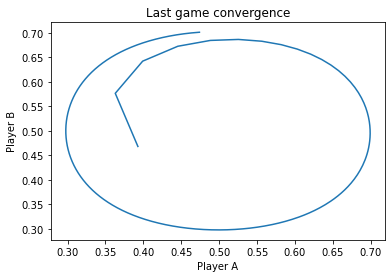

In [86]:
last_conv(last_conv_a, last_conv_b)

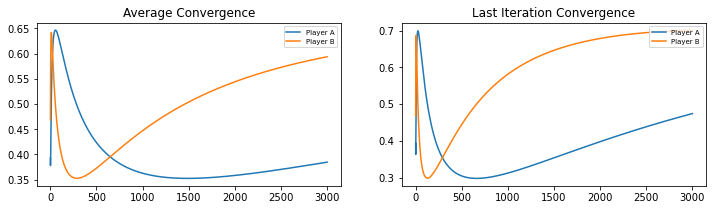

In [87]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 3: epsilon = 1/(t^2/3)**

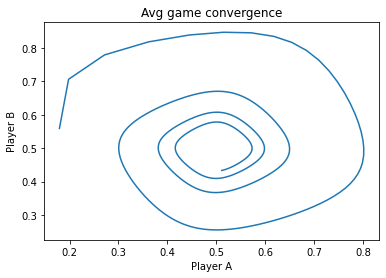

In [88]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

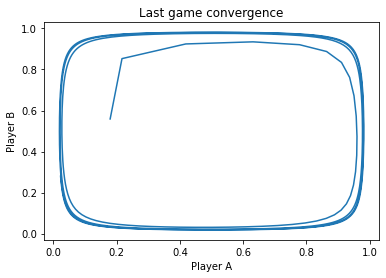

In [89]:
last_conv(last_conv_a, last_conv_b)

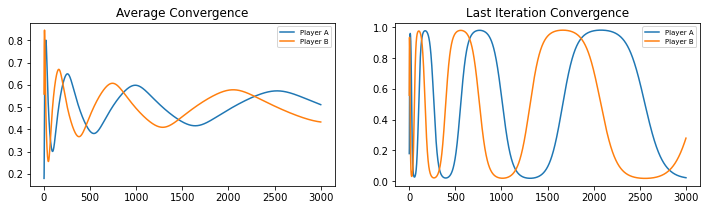

In [90]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 4: 1/sqrt(t)**

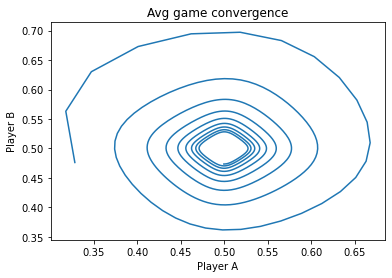

In [91]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

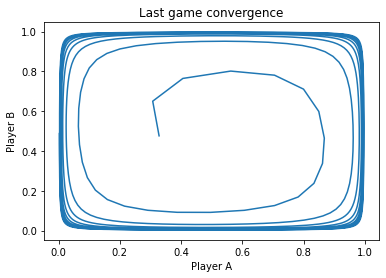

In [92]:
last_conv(last_conv_a, last_conv_b)

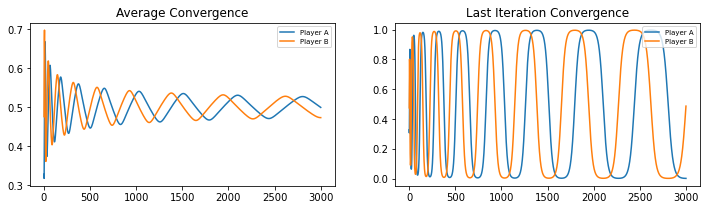

In [93]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 5: epsilon = 1/(t^(1/3))**

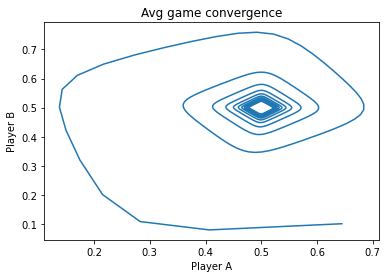

In [94]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

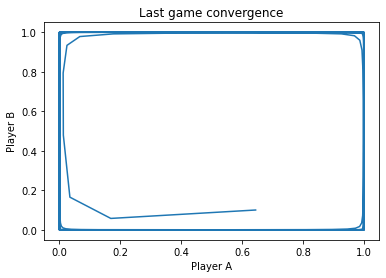

In [95]:
last_conv(last_conv_a, last_conv_b)

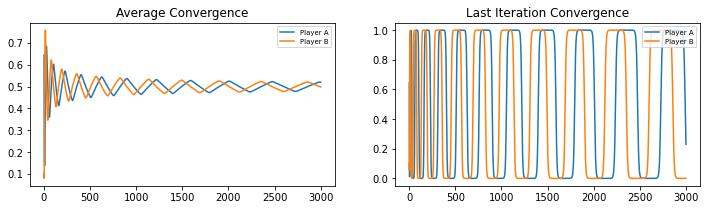

In [96]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

For the pennies game, the average and last iteration convergence results vary as follows:
<br>
<br>
Epsilon 1/2
<br>
Average Convergence – ranges from 0.44 to 0.56, converges to value of ½
<br>
Last Iteration Convergence – ranges from 0 to 1, seems to be binary value, either 0 or 1
<br>
<br>
Epsilon 1/t
<br>
Average Convergence – ranges from 0.35 to 0.65, does not seem to converge
<br>
Last Iteration Convergence – ranges from 0.3 to 0.7, does not seem to converge 
<br>
<br>
Epsilon 1/t^2/3
<br>
Average Convergence – ranges from 0.2 to 0.8, converges to 1/2
<br>
Last Iteration Convergence – ranges from 0 to 1, does not seem to converge
<br>

Epsilon 1/sqrt(t)
<br>
Average Convergence – ranges from 0.3 to 0.7, converges to 1/2
<br>
Last Iteration Convergence – range increases over time between 0 and 1, does not seem to converge
<br>
<br>
Epsilon 1/t^1/3
<br>
Average Convergence – ranges from 0.1 to 0.7, converges to 1/2
<br>
Last Iteration Convergence – ranges from 0 to 1, seems to be binary value either 0 or 1
<br>

#### Question (b) - Rock-paper-scissors game

In [97]:
# Example payoff matrices for RPS game. 0 - rock; 1 - paper; 2 - scissors
M_a = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
M_b = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])

**Choice 1: epsilon = 1/2**

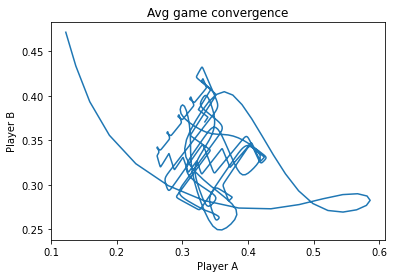

In [98]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

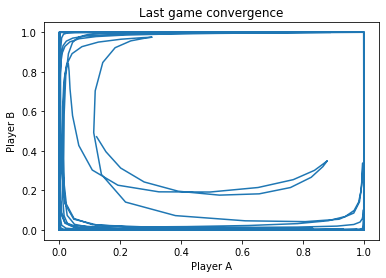

In [99]:
last_conv(last_conv_a, last_conv_b)

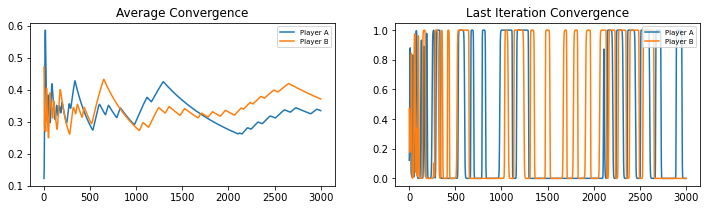

In [100]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 2: epsilon = 1/t**

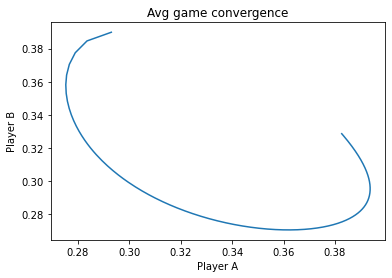

In [101]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

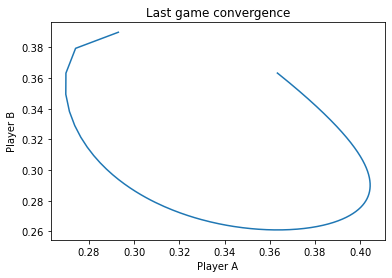

In [102]:
last_conv(last_conv_a, last_conv_b)

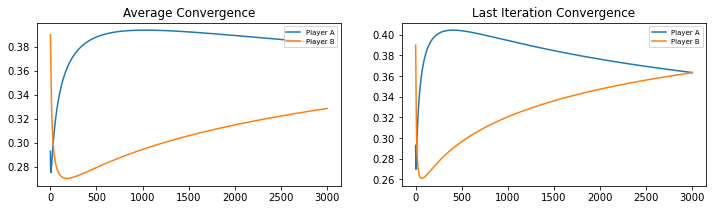

In [103]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 3: epsilon = 1/(t^2/3)**

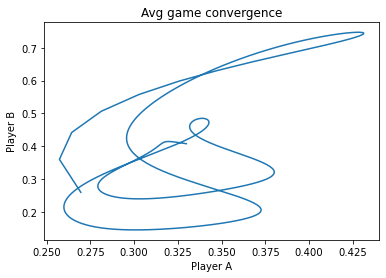

In [104]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

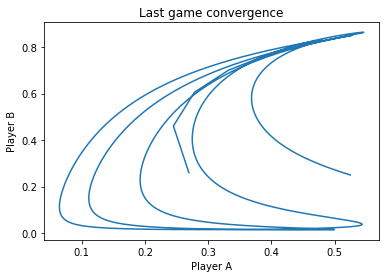

In [105]:
last_conv(last_conv_a, last_conv_b)

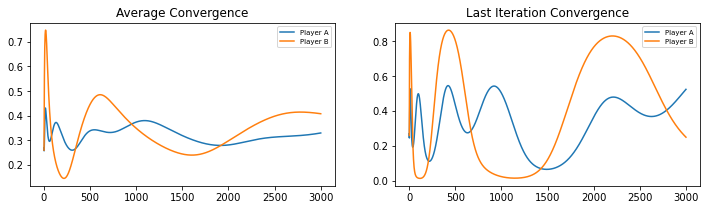

In [106]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 4: 1/sqrt(t)**

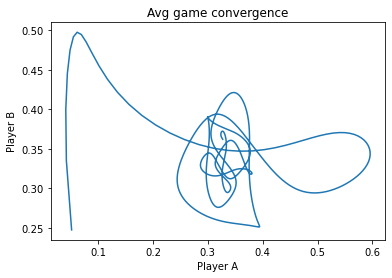

In [107]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

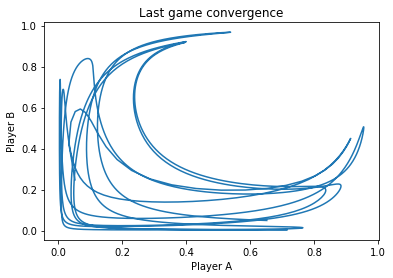

In [108]:
last_conv(last_conv_a, last_conv_b)

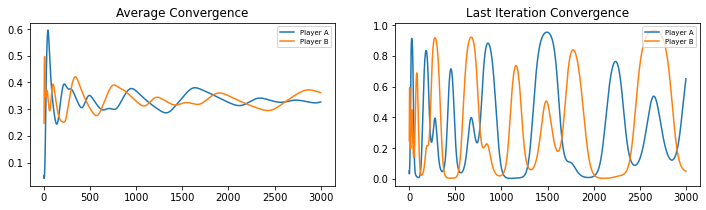

In [109]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 5: epsilon = 1/(t^(1/3))**

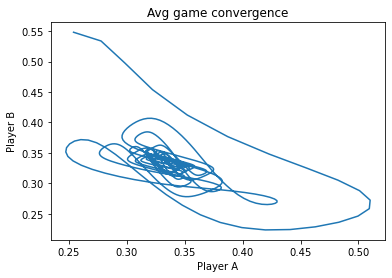

In [110]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

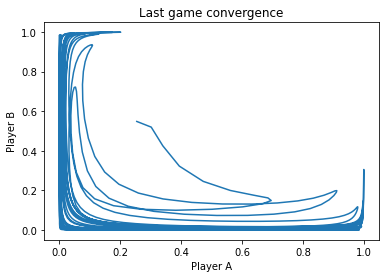

In [111]:
last_conv(last_conv_a, last_conv_b)

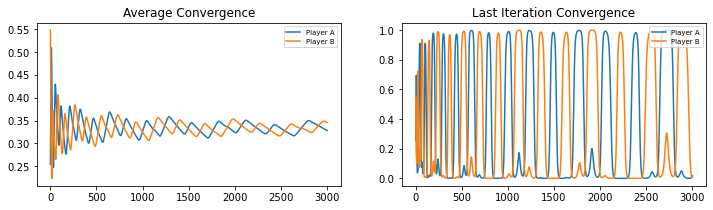

In [112]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

For the rock-paper-scissors game, the average and last iteration convergence results vary as follows:
<br>
<br>
Epsilon 1/2
<br>
Average Convergence – ranges from 0.1 to 0.6, converges to value of 0.33
<br>
Last Iteration Convergence – ranges from 0 to 1, seems to be binary value, either 0 or 1
<br>
<br>
Epsilon 1/t
<br>
Average Convergence – ranges from 0.25 to 0.4, does not seem to converge
<br>
Last Iteration Convergence – ranges from 0.25 to 0.4, does not seem to converge 
<br>
<br>
Epsilon 1/t^2/3
<br>
Average Convergence – ranges from 0.2 to 0.8, converges to 0.33
<br>
Last Iteration Convergence – ranges from 0 to 1, does not seem to converge
<br>

Epsilon 1/sqrt(t)
<br>
Average Convergence – ranges from 0 to 0.6, converges to 0.33
<br>
Last Iteration Convergence – range increases over time between 0 and 1, does not seem to converge
<br>
<br>
Epsilon 1/t^1/3
<br>
Average Convergence – ranges from 0.25 to 0.55, converges to 0.33
<br>
Last Iteration Convergence – ranges from 0 to 1, seems to be binary value either 0 or 1
<br>

#### Question (c)

In [113]:
# A function template to construct payoff matrices for the DIR game
# You DO NOT have to use this template
def construct_DIR(K, c):
    rho = max(K, c)
    M_a = np.zeros((K, K))
    M_b = np.zeros((K, K))
    
    for i in range(K):
        for j in range(K):
            if i <= (j+1):
                # something happens here
                M_a[i,j] = i/rho
            else:
                # something happens here
                M_a[i,j] = -c/rho
            if j <= i:
                # something happens here
                M_b[i,j] = j/rho
            else:
                # something happens here
                M_b[i,j] = -c/rho
    return M_a, M_b

**Choice 1: epsilon = 1/2**

C:\Users\yashk\AppData\Local\Temp/ipykernel_26692/686268958.py:63: RuntimeWarning: overflow encountered in multiply
  w_b = np.multiply(w_b, np.ones(k) - epsilon*cost_b)
C:\Users\yashk\AppData\Local\Temp/ipykernel_26692/686268958.py:51: RuntimeWarning: invalid value encountered in true_divide
  p_b = w_b/sum_w_b


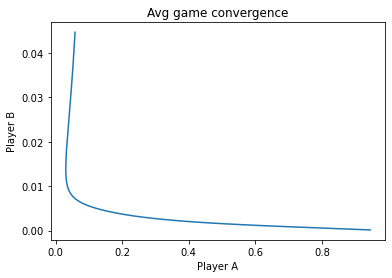

In [114]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 
K = 10
c = 30
M_a, M_b = construct_DIR(K, c)
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

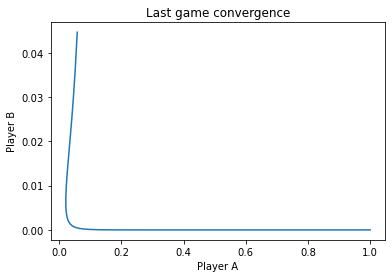

In [115]:
last_conv(last_conv_a, last_conv_b)

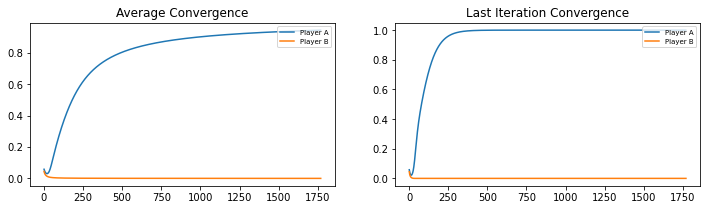

In [116]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 2: epsilon = 1/t**

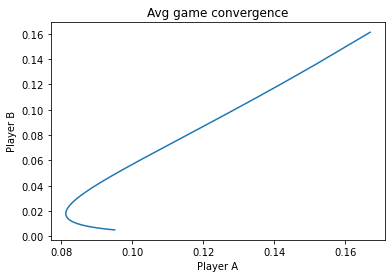

In [117]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 
K = 10
c = 30
M_a, M_b = construct_DIR(K, c)
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

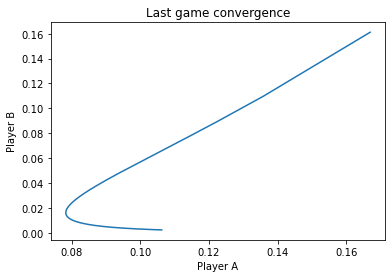

In [118]:
last_conv(last_conv_a, last_conv_b)

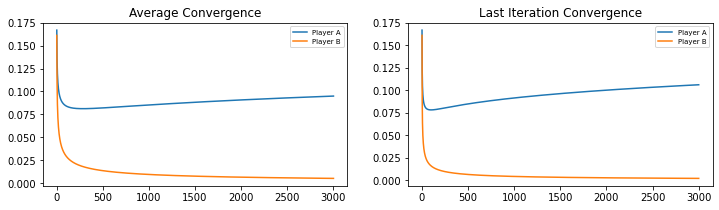

In [119]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 3: epsilon = 1/(t^2/3)**

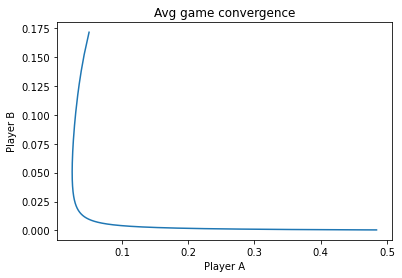

In [120]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 
K = 10
c = 30
M_a, M_b = construct_DIR(K, c)
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

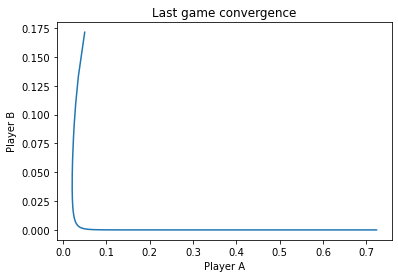

In [121]:
last_conv(last_conv_a, last_conv_b)

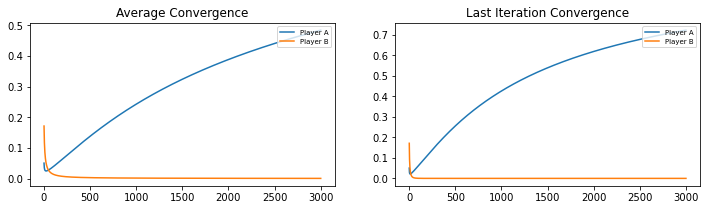

In [122]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 4: 1/sqrt(t)**

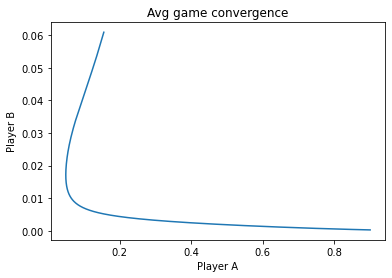

In [123]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 
K = 10
c = 30
M_a, M_b = construct_DIR(K, c)
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

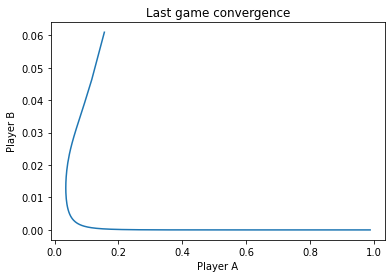

In [124]:
last_conv(last_conv_a, last_conv_b)

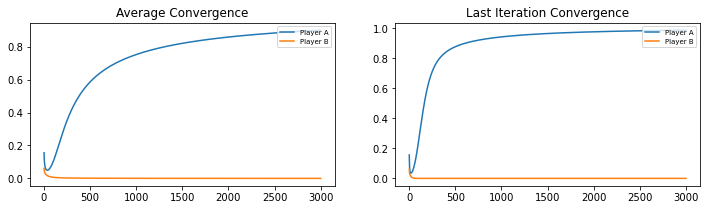

In [125]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 5: epsilon = 1/(t^(1/3))**

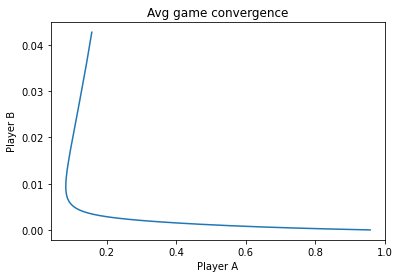

In [126]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 
K = 10
c = 30
M_a, M_b = construct_DIR(K, c)
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

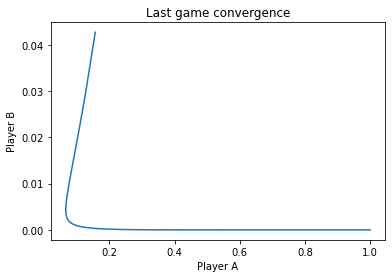

In [127]:
last_conv(last_conv_a, last_conv_b)

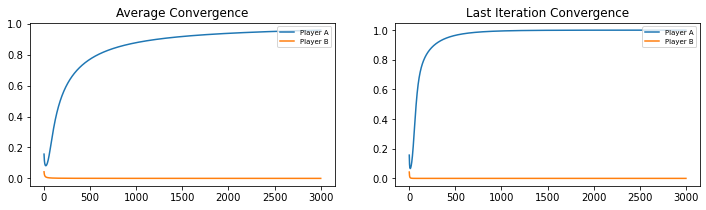

In [128]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

For the DIR game, the average and last iteration convergence results vary as follows:
<br>
<br>
Epsilon 1/2
<br>
Average Convergence – Player A converges to value of 1, Player B converges to value of 0
<br>
Last Iteration Convergence – Player A converges to value of 1, Player B converges to value of 0
<br>
<br>
Epsilon 1/t
<br>
Average Convergence – Player A converges to value of 0.1, Player B converges to value of 0
<br>
Last Iteration Convergence – Player A converges to value of 0.1, Player B converges to value of 0
<br>
<br>
Epsilon 1/t^2/3
<br>
Average Convergence – Player A seems to diverge, Player B converges to value of 0
<br>
Last Iteration Convergence – Player A seems to diverge, Player B converges to value of 0
<br>

Epsilon 1/sqrt(t)
<br>
Average Convergence – Player A converges to value of 1, Player B converges to value of 0
<br>
Last Iteration Convergence – Player A converges to value of 1, Player B converges to value of 0
<br>
<br>
Epsilon 1/t^1/3
<br>
Average Convergence – Player A converges to value of 1, Player B converges to value of 0
<br>
Last Iteration Convergence – Player A converges to value of 1, Player B converges to value of 0
<br>

### Task II: Uncoupled No-Regret Learning Dynamics under Bandit Information

In Task II, we create a exponential weight update (EXP3) algorithm. The EXP3 algorithm follows the logic that a list of weights are maintained for each action, and these weights are used to determine what action to take. These weights are then either increased or decreased based on the payoff matrix. Unlike with full information, we do not know the cost vector C, and therefore have to try to estimate it. Within the algorithm, we must define the following variables:
<ul>
<li><em>k</em>: number of strategies</li>
<li><em>T</em>: number of iterations
<li><em>w</em>: weights that determine the power of a strategy</li>
<li><em>M</em>: payoff matrix</li>
<li><em>cost</em>: the disutility from opponent winning the game</li>
</ul>
<newline>
The EXP3 algorithm uses the payoff matrix and a probability distribution to make a random choice based on the probability, and then creating a cost vector based on this random choice. This is then used to select the best strategy for that player, without full knowledge about the opponent.

In [129]:
import random

In [130]:
# An example template of the Multiplicative Weight Update Algorithm. 
# You DO NOT have to use this template

# ------- EXP3 Algorithm -------#
def EXP3(M_a, M_b, compute_epsilon, T = 3000):
    """
    Inputs:
        M_a: the k by k payoff matrix for player A, where k is the number of strategies: M_a[i,j] - the utility of A where A plays i and B plays j
        
        M_b: the k by k payoff matrix for player B, where k is the number of strategies: M_b[i,j] - the utility of B where A plays i and B plays j
        
        compute_epsilon: the function that computes epsilon
        
        T: the number of iterations. Default is 3000
        
    Output (not using dict here :-D ):
        avg_conv_a: the avg convergence seqeunce of A
        avg_conv_b: the avg convergence seqeunce of B
        last_conv_a: the last convergence seqeunce of A
        last_conv_b: the last convergence seqeunce of B
    """
    
    # The number of strategies
    k = M_a.shape[0]
    
    # The initial weight matrix for player A and B: w_a[i] - the weight of strategy i for player A
    w_a = np.array([random.uniform(0, 1) for _ in range(k)])
    w_b = np.array([random.uniform(0, 1) for _ in range(k)])
    
    # The convergence seqeunces
    avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = ([None] * T for i in range(4)) 
    
    # Sum of probability (used to compute average convergence sequences)
    sum_p_a = 0.0
    sum_p_b = 0.0
    
    # The game starts
    for t in range(T):
        # Compute epsilon
        epsilon = compute_epsilon(t)
        
        # ---------- Fill out the details --------------# 
        
        #sum of weights
        sum_w_a = np.sum(w_a)
        sum_w_b = np.sum(w_b)

        #probability
        p_a = w_a/sum_w_a #normalizing
        p_b = w_b/sum_w_b

        #adding probabilities
        sum_p_a += p_a[0]
        sum_p_b += p_b[0]
        
        # cost vector
        cost_a = np.matmul(M_a, p_b)
        cost_b = np.matmul(M_b.T, p_a)
        
        # making random choice based on probabilities
        choice_list = list(range(0,k))
        random_choice_a = random.choices(choice_list, p_a, k=1)
        random_choice_b = random.choices(choice_list, p_b, k=1)
        
        # creating c bar based on random choice
        cost_a_bar = np.zeros(k)
        cost_b_bar = np.zeros(k)
        cost_a_bar[random_choice_a] = cost_a[random_choice_a]/p_a[random_choice_a]
        cost_b_bar[random_choice_b] = cost_b[random_choice_b]/p_b[random_choice_b]

        #updating weights
        w_a = np.multiply(w_a, np.exp(-1*epsilon*cost_a_bar))
        w_b = np.multiply(w_b, np.exp(-1*epsilon*cost_b_bar))
        
        # avg convergence
        avg_conv_a[t] = sum_p_a/(t+1)
        avg_conv_b[t] = sum_p_b/(t+1)

        # last convergence
        last_conv_a[t] = p_a[0]
        last_conv_b[t] = p_b[0]
    
    return avg_conv_a, avg_conv_b, last_conv_a, last_conv_b

#### Question (a) - Pennies game

In [131]:
# Example payoff matrices for pennies game. 0 - head; 1 - tail
M_a = np.array([[-1, 1], [1, -1]])
M_b = np.array([[1, -1], [-1, 1]])

**Choice 1: epsilon = 1/2**

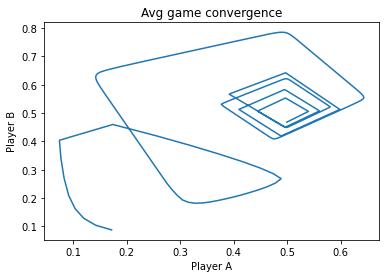

In [132]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

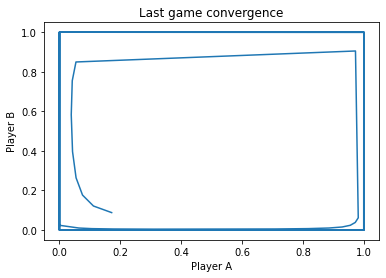

In [133]:
last_conv(last_conv_a, last_conv_b)

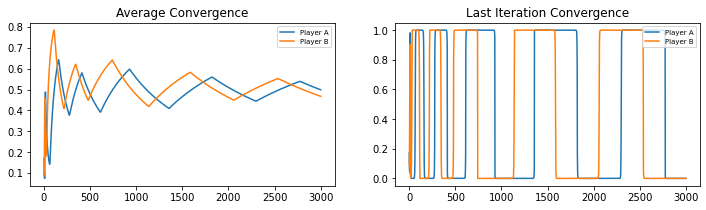

In [134]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 2: epsilon = 1/t**

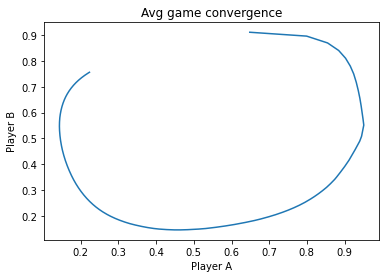

In [135]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

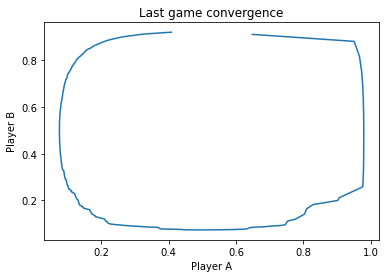

In [136]:
last_conv(last_conv_a, last_conv_b)

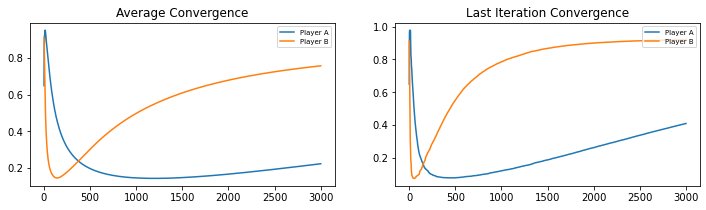

In [137]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 3: epsilon = 1/(t^2/3)**

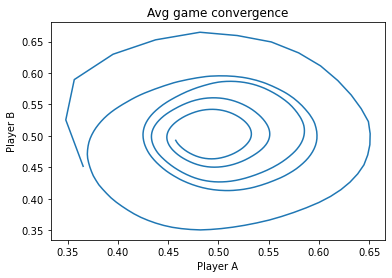

In [138]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

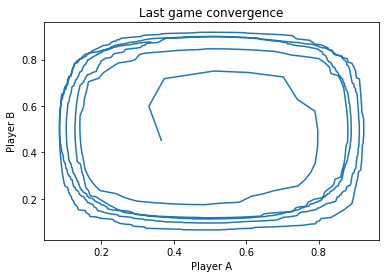

In [139]:
last_conv(last_conv_a, last_conv_b)

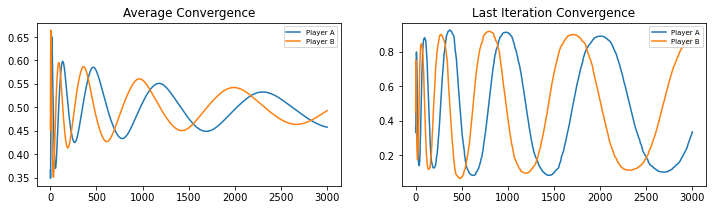

In [140]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 4: 1/sqrt(t)**

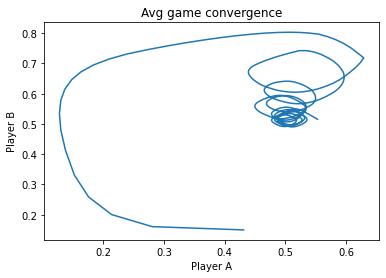

In [141]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

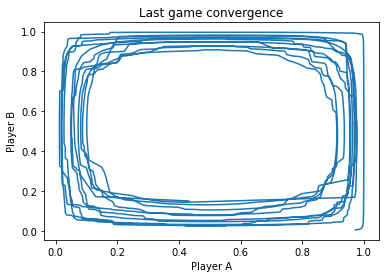

In [142]:
last_conv(last_conv_a, last_conv_b)

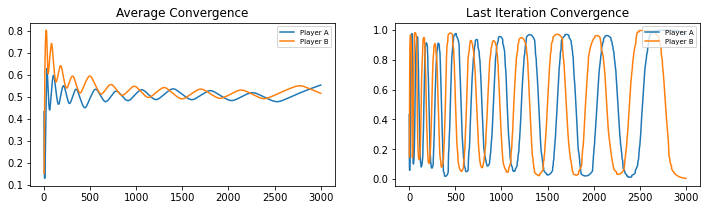

In [143]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 5: epsilon = 1/(t^(1/3))**

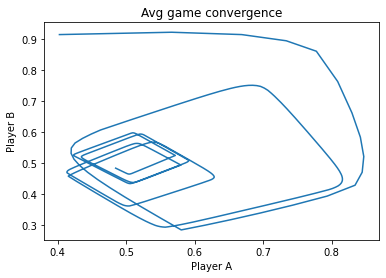

In [144]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

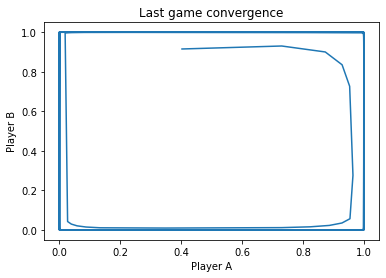

In [145]:
last_conv(last_conv_a, last_conv_b)

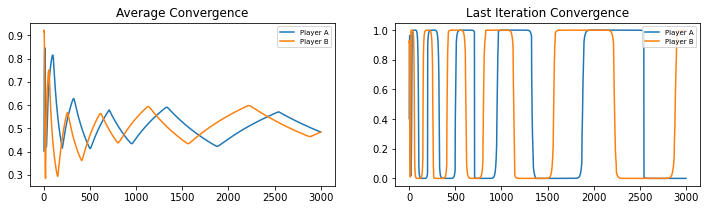

In [146]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

For the pennies game, the average and last iteration convergence results vary as follows:
<br>
<br>
Epsilon 1/2
<br>
Average Convergence – Player A converges to value of 0.5, Player B converges to value of 0.5
<br>
Last Iteration Convergence – Seems to be binary, either 0 or 1
<br>
<br>
Epsilon 1/t
<br>
Average Convergence – ranges from 0 to 1, seems to diverge
<br>
Last Iteration Convergence – ranges from 0 to 1, seems to diverge
<br>
<br>
Epsilon 1/t^2/3
<br>
Average Convergence – ranges from 0.35 to 0.65, converges to 0.5
<br>
Last Iteration Convergence – ranges seems to increase with time, does not seem to converge
<br>

Epsilon 1/sqrt(t)
<br>
Average Convergence – ranges from 0.1 to 0.8, converges to 0.5
<br>
Last Iteration Convergence – ranges seems to increase with time, does not seem to converge
<br>
<br>
Epsilon 1/t^1/3
<br>
Average Convergence – ranges from 0.3 to 0.9, converges to 0.5
<br>
Last Iteration Convergence – ranges seems to increase with time, does not seem to converge
<br>

#### Question (b) - Rock-paper-scissors game

In [147]:
# Example payoff matrices for RPS game. 0 - rock; 1 - paper; 2 - scissors
M_a = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
M_b = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])

**Choice 1: epsilon = 1/2**

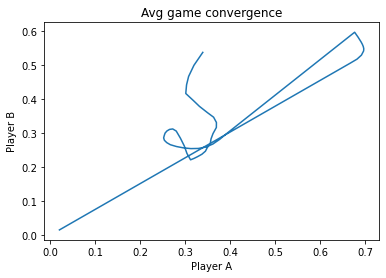

In [148]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

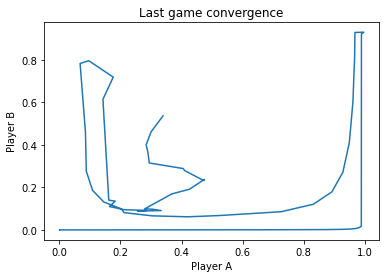

In [149]:
last_conv(last_conv_a, last_conv_b)

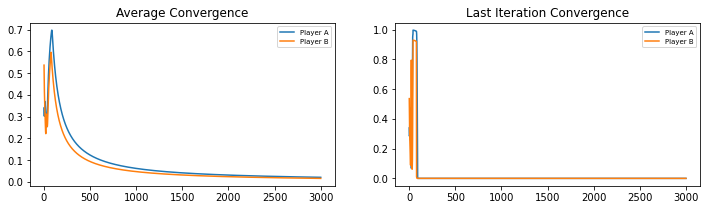

In [150]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 2: epsilon = 1/t**

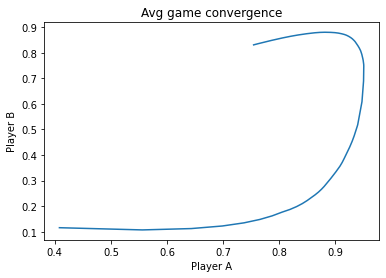

In [151]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

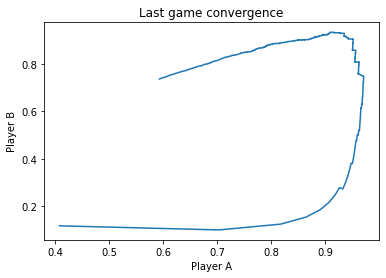

In [152]:
last_conv(last_conv_a, last_conv_b)

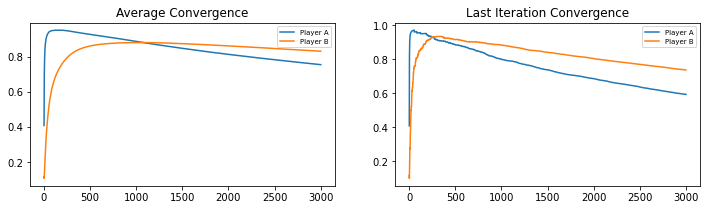

In [153]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 3: epsilon = 1/(t^2/3)**

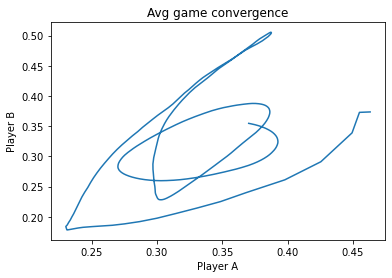

In [154]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

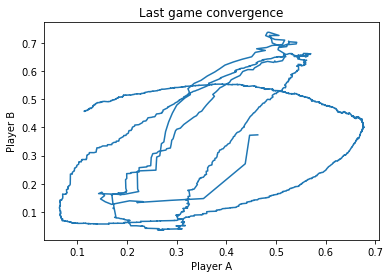

In [155]:
last_conv(last_conv_a, last_conv_b)

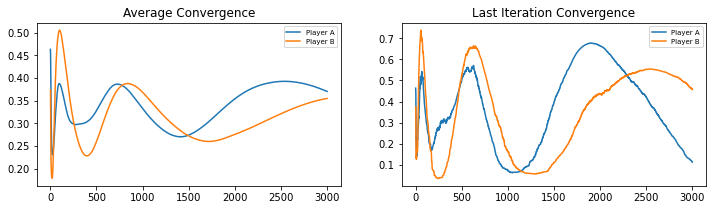

In [156]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 4: 1/sqrt(t)**

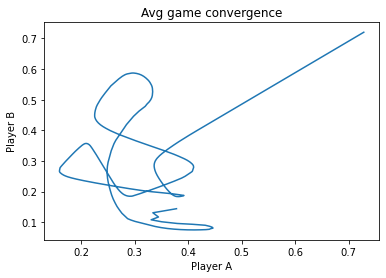

In [157]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

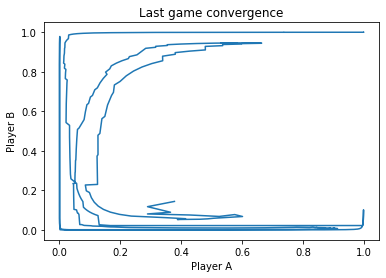

In [158]:
last_conv(last_conv_a, last_conv_b)

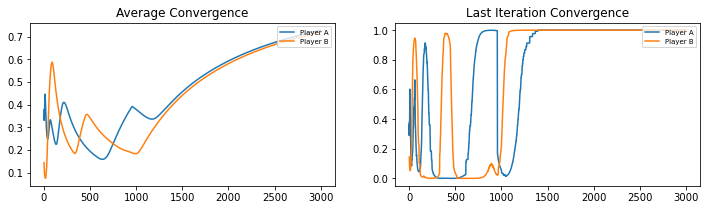

In [159]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

**Choice 5: epsilon = 1/(t^(1/3))**

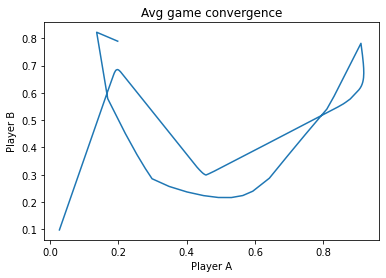

In [160]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

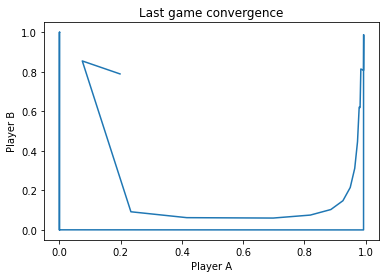

In [161]:
last_conv(last_conv_a, last_conv_b)

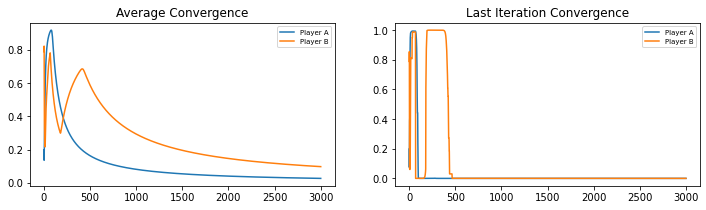

In [162]:
time_plot(avg_conv_a, avg_conv_b, last_conv_a, last_conv_b)

For the rock-paper-scissors game, the average and last iteration convergence results vary as follows:
<br>
<br>
Epsilon 1/2
<br>
Average Convergence – Both players converge to 0
<br>
Last Iteration Convergence – Both players converge to 0
<br>
<br>
Epsilon 1/t
<br>
Average Convergence – ranges from 0 to 1, seems to diverge
<br>
Last Iteration Convergence – ranges from 0 to 1, seems to diverge
<br>
<br>
Epsilon 1/t^2/3
<br>
Average Convergence – ranges from 0.15 to 0.5, converges to 0.35
<br>
Last Iteration Convergence – ranges from 0.15 to 0.75, does not seem to converge
<br>

Epsilon 1/sqrt(t)
<br>
Average Convergence – ranges from 0 to 0.7, increases with time, does not seem to converge
<br>
Last Iteration Convergence – Both players seem to converge to 1
<br>
<br>
Epsilon 1/t^1/3
<br>
Average Convergence – ranges from 0.2 to 0.9, converges to 0
<br>
Last Iteration Convergence – Both players converge to 0
<br>